In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from itertools import chain
from sklearn.decomposition import LatentDirichletAllocation,NMF,TruncatedSVD
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_excel("telecom_complaints_data.xlsx")

In [3]:
data1.head()

,Ticket,Customer Complaint,Date,Received Via,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,Customer Care Call,Closed,No
1,223441,Payment disappear - service got disconnected,2015-08-04,Internet,Closed,No
2,242732,Speed and Service,2015-04-18,Internet,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,Internet,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,Internet,Solved,No


In [4]:
data1.shape

(2224, 6)

# Data Preprocessing

In [5]:
def clean_text(text):
    chat = str(text).lower()
    chat = re.sub(r'[,!@#$%^&*():;0-9]',' ',chat)
    chat = re.sub(' +',' ',chat)
    chat = " ".join([x for x in str(chat).split() if len(x) > 1])
    return chat

In [6]:
data1['text1'] = data1['Customer Complaint'].apply(lambda x: clean_text(x))

In [7]:
def top_n_unigrams(text):
    cv = CountVectorizer(ngram_range = (1,1),stop_words = 'english')
    bow1 = cv.fit_transform(text)
    sum_words = bow1.sum(axis = 0)
    word_freq = [(word,sum_words[0,i]) for word,i in cv.vocabulary_.items()]
    word_freq = sorted(word_freq,key = lambda x: x[1],reverse = True)
    return word_freq

In [8]:
def top_n_bigrams(text):
    cv = CountVectorizer(ngram_range = (2,2),stop_words = 'english')
    bow1 = cv.fit_transform(text)
    sum_words = bow1.sum(axis = 0)
    word_freq = [(word,sum_words[0,i]) for word,i in cv.vocabulary_.items()]
    word_freq = sorted(word_freq,key = lambda x: x[1],reverse = True)
    return word_freq

In [9]:
def top_n_trigrams(text):
    cv = CountVectorizer(ngram_range = (3,3),stop_words = 'english')
    bow1 = cv.fit_transform(text)
    sum_words = bow1.sum(axis = 0)
    word_freq = [(word,sum_words[0,i]) for word,i in cv.vocabulary_.items()]
    word_freq = sorted(word_freq,key = lambda x: x[1],reverse = True)
    return word_freq

In [10]:
unigrams = top_n_unigrams(data1['text1'])
bigrams = top_n_bigrams(data1['text1'])
trigrams = top_n_trigrams(data1['text1'])

unigrams_dict = dict(unigrams)
bigrams_dict = dict(bigrams)
trigrams_dict = dict(trigrams)

unigrams_dict = {x.replace(' ','_'):y for x,y in unigrams_dict.items()}
bigrams_dict = {x.replace(' ','_'):y for x,y in bigrams_dict.items()}
trigrams_dict = {x.replace(' ','_'):y for x,y in trigrams_dict.items()}

# Top 30 Unigrams

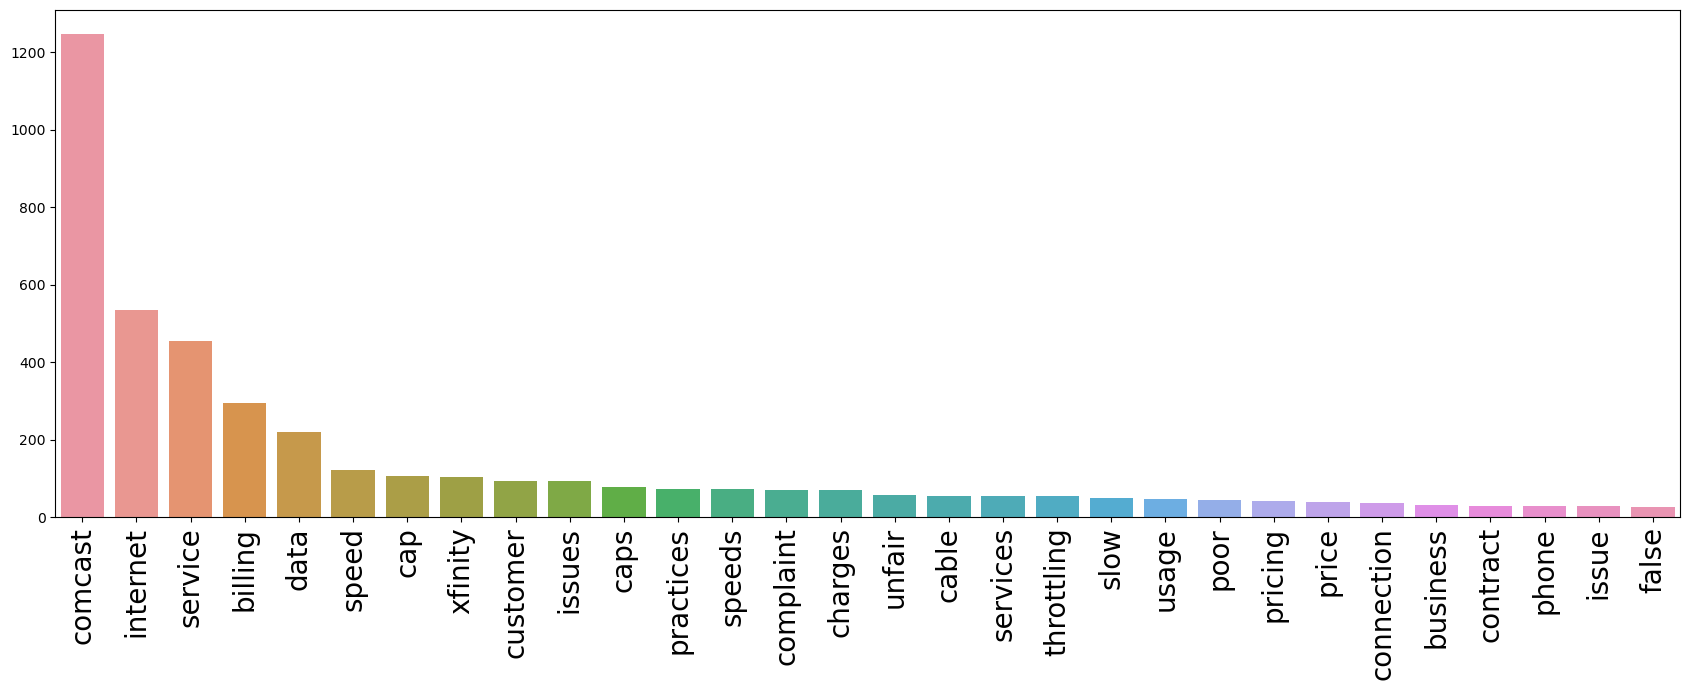

In [11]:
keys = list(unigrams_dict.keys())
keys = keys[:30]
# get values in the same order as keys, and parse percentage values
vals = list(unigrams_dict.values())
vals = vals[:30]
plt.figure(figsize=(17, 7))
sns.barplot(x=keys, y=vals)
plt.xticks(rotation=90,size = 20)
plt.tight_layout()

# Top 30 Bigrams

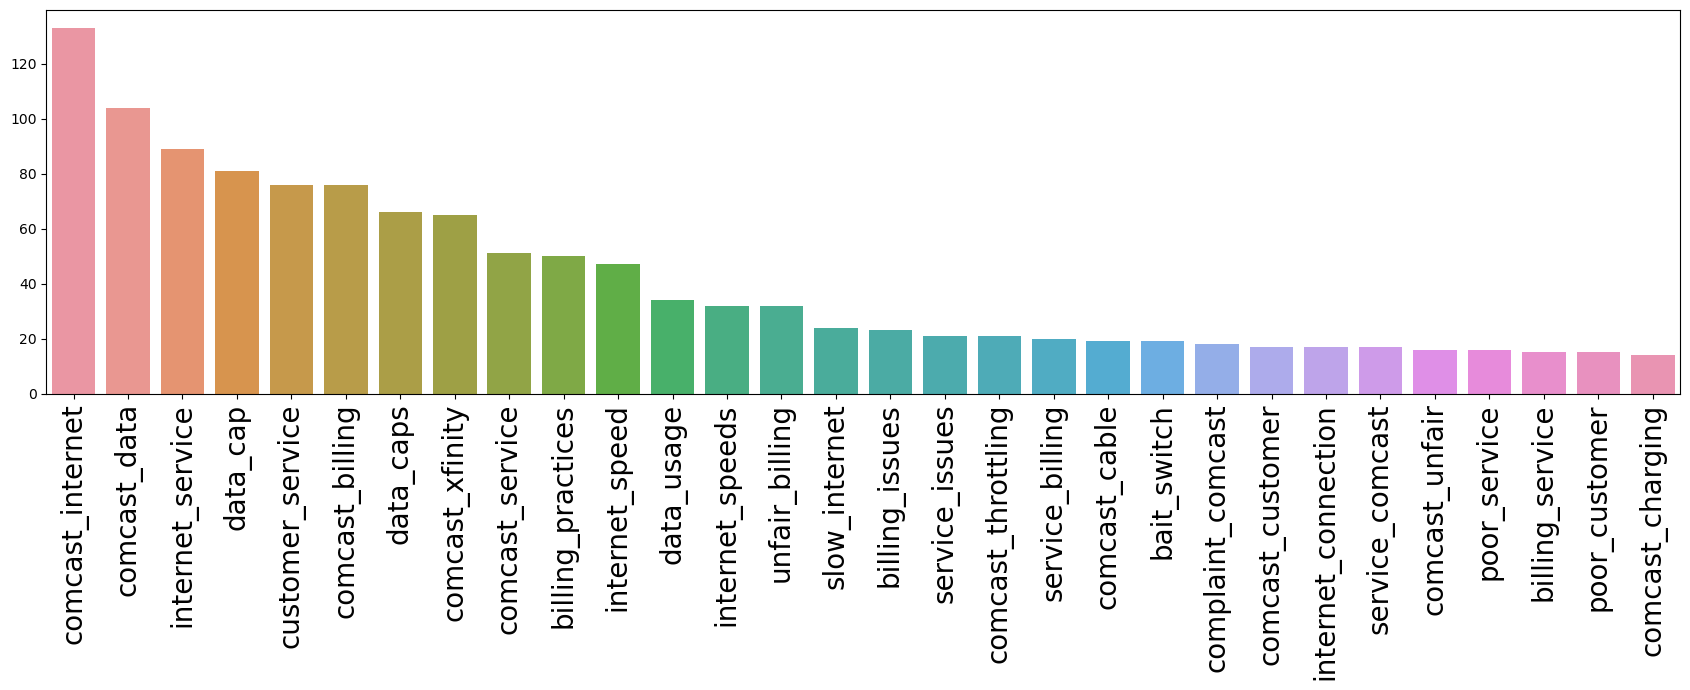

In [12]:
keys = list(bigrams_dict.keys())
keys = keys[:30]
# get values in the same order as keys, and parse percentage values
vals = list(bigrams_dict.values())
vals = vals[:30]
plt.figure(figsize=(17, 7))
sns.barplot(x=keys, y=vals)
plt.xticks(rotation=90,size = 20)
plt.tight_layout()

# Top 30 Trigrams

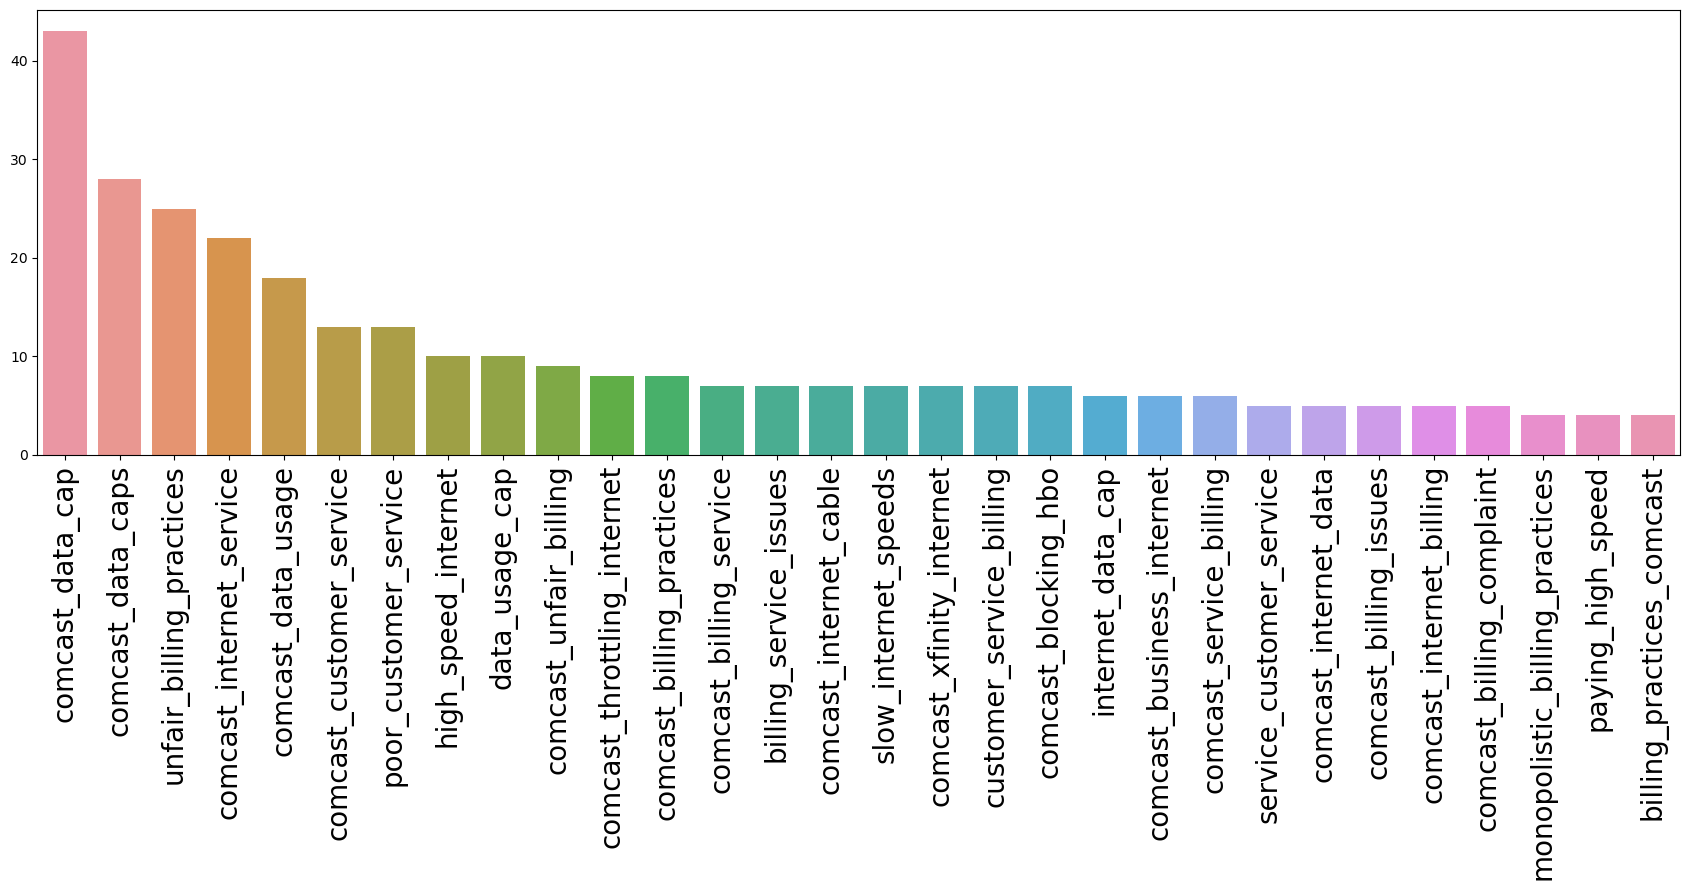

In [13]:
keys = list(trigrams_dict.keys())
keys = keys[:30]
# get values in the same order as keys, and parse percentage values
vals = list(trigrams_dict.values())
vals = vals[:30]
plt.figure(figsize=(17, 9))
sns.barplot(x=keys, y=vals)
plt.xticks(rotation=90,size = 20)
plt.tight_layout()

# Wordclouds

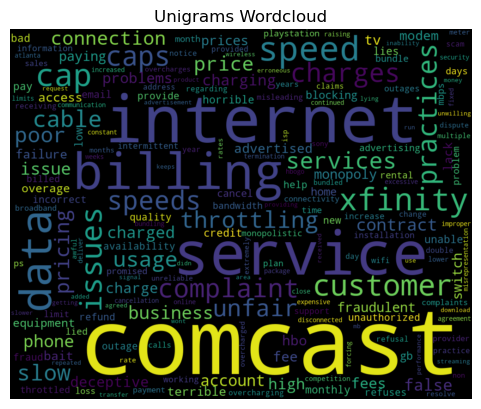

In [14]:
cloud1 = WordCloud(height = 800,width = 1000)
cloud1.generate_from_frequencies(unigrams_dict)
plt.imshow(cloud1,interpolation = 'bilinear')
plt.axis('off')
plt.title('Unigrams Wordcloud')
plt.show()
cloud1.to_file(r"Unigrams.png")

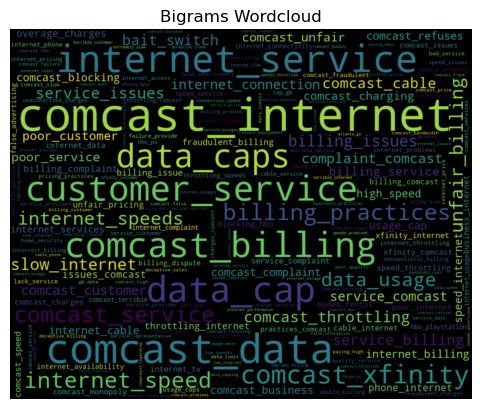

In [15]:
cloud2 = WordCloud(height = 800,width = 1000)
cloud2.generate_from_frequencies(bigrams_dict)
plt.imshow(cloud2,interpolation = 'bilinear')
plt.axis('off')
plt.title('Bigrams Wordcloud')
plt.show()
cloud2.to_file(r"Bigrams.png")

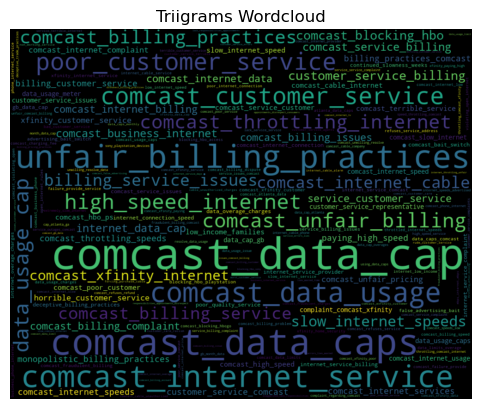

In [16]:
cloud3 = WordCloud(height = 800,width = 1000)
cloud3.generate_from_frequencies(trigrams_dict)
plt.imshow(cloud3,interpolation = 'bilinear')
plt.axis('off')
plt.title('Triigrams Wordcloud')
plt.show()
cloud3.to_file(r"Trigrams.png")

In [17]:
data1.head()

,Ticket,Customer Complaint,Date,Received Via,Status,Filing on Behalf of Someone,text1
0,250635,Comcast Cable Internet Speeds,2015-04-22,Customer Care Call,Closed,No,comcast cable internet speeds
1,223441,Payment disappear - service got disconnected,2015-08-04,Internet,Closed,No,payment disappear service got disconnected
2,242732,Speed and Service,2015-04-18,Internet,Closed,Yes,speed and service
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,Internet,Open,Yes,comcast imposed new usage cap of gb that punis...
4,307175,Comcast not working and no service to boot,2015-05-26,Internet,Solved,No,comcast not working and no service to boot


In [18]:
data1['Status'].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [19]:
data1['Filing on Behalf of Someone'].value_counts()

No     2021
Yes     203
Name: Filing on Behalf of Someone, dtype: int64

In [20]:
data1['Received Via'].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

In [21]:
pd.crosstab(data1['Status'],data1['Received Via'])

Received Via,Customer Care Call,Internet
Status,,
Closed,387,347
Open,186,177
Pending,69,85
Solved,477,496


# NMF model for topic modelling

In [68]:
cv = CountVectorizer(ngram_range = (1,1))
bow1 = cv.fit_transform(data1['text1'])
nmf_model = NMF(n_components = 5,init = 'random',solver = 'cd',random_state = 43,max_iter = 1000)
nmf_model_output = nmf_model.fit(bow1)
nmf_features = nmf_model.transform(bow1)

print(bow1.shape,nmf_features.shape,nmf_model.components_.shape)

components_df = pd.DataFrame(nmf_model.components_, columns=cv.get_feature_names_out())

topic_values = nmf_model.transform(bow1)
data1['Topic'] = topic_values.argmax(axis=1)

def show_topics(vectorizer,model,n):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(cv, nmf_model,10)
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

(2224, 1442) (2224, 5) (5, 1442)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,service,customer,and,to,for,of,poor,no,the,not
Topic 1,data,cap,caps,usage,and,gb,limit,of,meter,overage
Topic 2,billing,and,practices,issues,unfair,fraudulent,deceptive,of,bait,switch
Topic 3,comcast,to,xfinity,complaint,my,me,charges,is,by,from
Topic 4,internet,speed,for,speeds,slow,and,cable,not,connection,phone


In [69]:
data1['Topic'].value_counts()

3    651
4    647
0    395
2    311
1    220
Name: Topic, dtype: int64

In [70]:
cv = CountVectorizer(ngram_range = (1,1),stop_words = 'english')
bow1 = cv.fit_transform(data1['text1'])
nmf_model = NMF(n_components = 5,init = 'random',solver = 'cd',random_state = 43,max_iter = 1000)
nmf_model_output = nmf_model.fit(bow1)
nmf_features = nmf_model.transform(bow1)

print(bow1.shape,nmf_features.shape,nmf_model.components_.shape)

components_df = pd.DataFrame(nmf_model.components_, columns=cv.get_feature_names_out())

topic_values = nmf_model.transform(bow1)
data1['Topic'] = topic_values.argmax(axis=1)

def show_topics(vectorizer,model,n):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(cv, nmf_model,10)
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

(2224, 1295) (2224, 5) (5, 1295)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,speed,xfinity,throttling,high,issues,connection,paying,slow,advertised,poor
Topic 1,internet,speeds,slow,cable,phone,tv,connection,services,throttling,price
Topic 2,service,customer,poor,issues,horrible,comcast,bad,failure,terrible,lack
Topic 3,billing,practices,issues,unfair,fraudulent,issue,deceptive,comcast,dispute,monopolistic
Topic 4,comcast,data,cap,xfinity,caps,complaint,usage,charges,throttling,contract


In [71]:
data1['Topic'].value_counts()

4    1057
2     376
3     360
0     219
1     212
Name: Topic, dtype: int64

In [72]:
cv = CountVectorizer(ngram_range = (1,2),stop_words = 'english')
bow1 = cv.fit_transform(data1['text1'])
nmf_model = NMF(n_components = 5,init = 'random',solver = 'cd',random_state = 43,max_iter = 1000)
nmf_model_output = nmf_model.fit(bow1)
nmf_features = nmf_model.transform(bow1)

print(bow1.shape,nmf_features.shape,nmf_model.components_.shape)

components_df = pd.DataFrame(nmf_model.components_, columns=cv.get_feature_names_out())

topic_values = nmf_model.transform(bow1)
data1['Topic'] = topic_values.argmax(axis=1)

def show_topics(vectorizer,model,n):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(cv, nmf_model,10)
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

(2224, 4511) (2224, 5) (5, 4511)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,comcast,xfinity,comcast xfinity,comcast internet,complaint,charges,comcast billing,comcast service,throttling,comcast data
Topic 1,internet,comcast internet,speed,internet service,internet speed,slow,speeds,internet speeds,slow internet,cable
Topic 2,billing,practices,comcast billing,billing practices,unfair,issues,unfair billing,billing issues,service billing,billing service
Topic 3,service,customer,customer service,internet service,comcast service,poor,issues,service issues,service billing,poor customer
Topic 4,data,comcast data,cap,data cap,caps,data caps,usage,data usage,usage cap,gb


In [73]:
data1['Topic'].value_counts()

0    1103
1     320
2     292
3     277
4     232
Name: Topic, dtype: int64

In [74]:
data1.head()

,Ticket,Customer Complaint,Date,Received Via,Status,Filing on Behalf of Someone,text1,Topic
0,250635,Comcast Cable Internet Speeds,2015-04-22,Customer Care Call,Closed,No,comcast cable internet speeds,0
1,223441,Payment disappear - service got disconnected,2015-08-04,Internet,Closed,No,payment disappear service got disconnected,3
2,242732,Speed and Service,2015-04-18,Internet,Closed,Yes,speed and service,3
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,Internet,Open,Yes,comcast imposed new usage cap of gb that punis...,0
4,307175,Comcast not working and no service to boot,2015-05-26,Internet,Solved,No,comcast not working and no service to boot,0
